**load data/packages**

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import scipy
from scipy.stats import pearsonr
import sklearn
from datetime import datetime
import locale
import time
from random import randint
import math

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [4]:
pd.set_option('display.max_rows', 3000)

In [10]:
check = pd.read_csv("../Data for modelling/hourly_traffic_noise_weather_2022.csv", header = 0, sep=',')
display(check)

,month,day,hour,description,lamax,laeq,date,heavy,car,bike,pedestrian,timezone,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_TEMP_QCL3
0,6,1,0,MP 05: Calvariekapel KU Leuven,46.389500,43.854917,00:00 01-06-2022,0.000000,0.000000,0.000000,0.000000,Europe/Brussels,0.000000,0.000000,-1.339506,0.007145,10.378574
1,6,1,1,MP 05: Calvariekapel KU Leuven,42.325056,39.724889,01:00 01-06-2022,0.000000,0.000000,0.000000,0.000000,Europe/Brussels,0.000000,0.000000,-2.313272,0.020062,9.603619
2,6,1,2,MP 05: Calvariekapel KU Leuven,40.794889,38.388694,02:00 01-06-2022,0.000000,0.000000,0.000000,0.000000,Europe/Brussels,0.000000,0.000000,-4.881173,0.014985,9.042755
3,6,1,3,MP 05: Calvariekapel KU Leuven,40.153528,38.418528,03:00 01-06-2022,20.532319,6.844106,20.532319,0.000000,Europe/Brussels,0.000000,0.000000,-3.787037,0.013488,8.435343
4,6,1,4,MP 05: Calvariekapel KU Leuven,41.507194,39.652750,04:00 01-06-2022,37.894737,87.157895,56.842105,2.526316,Europe/Brussels,0.000000,0.000000,-1.902778,0.025355,7.976961
5,6,1,5,MP 05: Calvariekapel KU Leuven,44.784722,43.499833,05:00 01-06-2022,33.997901,156.138510,175.026233,2.518363,Europe/Brussels,0.000000,0.000000,-1.195988,0.032840,7.681701
6,6,1,6,MP 05: Calvariekapel KU Leuven,53.282028,52.133722,06:00 01-06-2022,49.151292,263.025830,475.571956,19.926199,Europe/Brussels,0.000011,0.000000,-4.569444,0.050231,7.666664
7,6,1,7,MP 05: Calvariekapel KU Leuven,63.940500,62.904306,07:00 01-06-2022,29.117647,210.441176,338.823529,9.264706,Europe/Brussels,0.000000,0.000000,-16.973765,0.126590,9.232287
8,6,1,8,MP 05: Calvariekapel KU Leuven,64.111056,63.126500,08:00 01-06-2022,34.386481,197.060985,234.092579,13.225569,Europe/Brussels,0.000000,0.000000,-22.916667,0.171343,10.985260
9,6,1,9,MP 05: Calvariekapel KU Leuven,61.605556,60.312167,09:00 01-06-2022,14.655811,242.487047,182.531458,9.326425,Europe/Brussels,0.000011,0.000003,-26.262346,0.296265,13.310383


In [59]:
X_train = pd.read_csv("../Data for modelling/X_train_MP05.csv", header = 0, sep=',')
display(X_train)

,index,Hour,"['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_1","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_2","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_3","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_4","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_5","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_6","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_7",Holiday,is_kul_holiday,LC_TEMP_QCL3,LC_RAININ,LC_DAILYRAIN,LC_WINDSPEED,heavy,car,bike,pedestrian
0,3697,1,False,False,False,False,False,True,False,0,False,17.842604,0.000000,0.000000,0.095509,0.000000,0.000000,0.000000,0.000000
1,3927,15,True,False,False,False,False,False,False,0,False,20.223029,0.000000,0.000000,0.677022,16.091020,125.802519,215.034539,42.421780
2,3644,20,False,False,True,False,False,False,False,0,False,15.986640,0.000000,0.000028,0.400509,0.000000,0.000000,0.000000,0.000000
3,3698,2,False,False,False,False,False,True,False,0,False,17.571497,0.000000,0.000000,0.161698,0.000000,0.000000,0.000000,0.000000
4,3767,23,True,False,False,False,False,False,False,1,False,13.130341,0.000000,0.000139,0.010154,0.000000,0.000000,0.000000,0.000000
5,3926,14,True,False,False,False,False,False,False,0,False,19.882433,0.000000,0.000000,0.637778,14.922280,160.414508,290.984456,35.440415
6,3919,7,True,False,False,False,False,False,False,0,False,12.984169,0.000000,0.000000,0.048410,16.768183,175.420996,285.059119,19.347904
7,3796,4,False,False,True,False,False,False,False,0,False,12.490269,0.000000,0.000046,0.011019,35.467980,98.219022,64.115195,1.364153
8,3746,2,True,False,False,False,False,False,False,1,False,14.992525,0.000008,0.000037,0.353318,0.000000,0.000000,0.000000,0.000000
9,3716,20,False,False,False,False,False,True,False,0,False,24.488230,0.000000,0.000000,0.200324,0.000000,0.000000,0.000000,0.000000


In [60]:
X_test = pd.read_csv("../Data for modelling/X_test_MP05.csv", header = 0, sep=',')
display(X_test)

,index,Hour,"['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_1","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_2","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_3","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_4","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_5","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_6","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_7",Holiday,is_kul_holiday,LC_TEMP_QCL3,LC_RAININ,LC_DAILYRAIN,LC_WINDSPEED,heavy,car,bike,pedestrian
0,3648,0,False,False,False,True,False,False,False,0,False,10.011860,0.000000,0.000008,0.005386,0.000000,0.000000,0.000000,0.000000
1,3750,6,True,False,False,False,False,False,False,1,False,12.853153,0.000002,0.000065,0.244691,7.600281,46.868403,97.536946,0.000000
2,3663,15,False,False,False,True,False,False,False,0,False,20.575862,0.000000,0.000000,0.309367,10.847458,107.118644,142.372881,8.135593
3,3632,8,False,False,True,False,False,False,False,0,False,10.985260,0.000000,0.000000,0.171343,34.386481,197.060985,234.092579,13.225569
4,3793,1,False,False,True,False,False,False,False,0,False,13.203364,0.000000,0.000046,0.013071,0.000000,0.000000,0.000000,0.000000
5,3889,1,False,False,False,False,False,False,True,1,False,13.668075,0.000000,0.000000,0.013611,0.000000,0.000000,0.000000,0.000000
6,3784,16,False,True,False,False,False,False,False,0,False,18.205018,0.000002,0.003481,0.180247,15.853211,165.137615,400.293578,18.495413
7,3874,10,False,False,False,False,False,True,False,0,False,17.327812,0.000000,0.000000,0.190309,1.285255,145.233845,219.778650,12.852553
8,3818,2,False,False,False,True,False,False,False,0,False,13.944207,0.000003,0.000250,0.224552,0.000000,0.000000,0.000000,0.000000
9,3910,22,False,False,False,False,False,False,True,1,False,16.500351,0.000000,0.000000,0.053009,0.000000,0.000000,0.000000,0.000000


In [61]:
y_train = pd.read_csv("../Data for modelling/y_train_MP05.csv", header = 0, sep=',')
display(y_train)

,laeq
0,44.487056
1,55.025278
2,55.877694
3,40.785056
4,49.771333
5,54.624694
6,54.509833
7,40.943028
8,38.585889
9,54.272611


In [62]:
y_test = pd.read_csv("../Data for modelling/y_test_MP05.csv", header = 0, sep=',')
display(y_test)

,laeq
0,45.375778
1,40.937222
2,55.754028
3,63.126500
4,39.424528
5,44.854389
6,55.132361
7,53.607306
8,40.395139
9,50.944861


In [63]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

260 260 66 66


**Traffic was only counted from 3-19 so we drop other hours (are all 0)**

In [64]:
#Keep only hours where traffic is measured in train data
train_data = pd.concat([X_train, y_train], axis = 1)

train_data['Hour'] = train_data['Hour'].astype('int')
train_data = train_data[(train_data['Hour'] > 2) & (train_data['Hour'] < 20)]

train_data['Hour'] = train_data['Hour'] - 3

y_traintr = train_data['laeq']
X_traintr = train_data.drop(['laeq', 'is_kul_holiday'], axis = 1)
display(X_traintr)

,index,Hour,"['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_1","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_2","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_3","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_4","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_5","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_6","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_7",Holiday,LC_TEMP_QCL3,LC_RAININ,LC_DAILYRAIN,LC_WINDSPEED,heavy,car,bike,pedestrian
1,3927,12,True,False,False,False,False,False,False,0,20.223029,0.000000,0.000000,0.677022,16.091020,125.802519,215.034539,42.421780
5,3926,11,True,False,False,False,False,False,False,0,19.882433,0.000000,0.000000,0.637778,14.922280,160.414508,290.984456,35.440415
6,3919,4,True,False,False,False,False,False,False,0,12.984169,0.000000,0.000000,0.048410,16.768183,175.420996,285.059119,19.347904
7,3796,1,False,False,True,False,False,False,False,0,12.490269,0.000000,0.000046,0.011019,35.467980,98.219022,64.115195,1.364153
10,3630,3,False,False,True,False,False,False,False,0,7.666664,0.000011,0.000000,0.050231,49.151292,263.025830,475.571956,19.926199
11,3808,13,False,False,True,False,False,False,False,0,15.789876,0.000239,0.022599,0.210571,16.041589,224.582250,375.640550,24.062384
12,3849,6,False,False,False,False,True,False,False,0,17.147440,0.000003,0.000000,0.327500,30.141973,289.625046,326.319621,17.036767
13,3871,4,False,False,False,False,False,True,False,0,16.723835,0.000000,0.000000,0.067160,7.747489,154.949785,180.774749,7.747489
14,3701,2,False,False,False,False,False,True,False,0,15.750381,0.000000,0.000000,0.234090,23.783032,42.559110,27.538248,5.006954
15,3641,14,False,False,True,False,False,False,False,0,16.826105,0.000000,0.000028,0.435340,15.640840,97.755250,372.773353,37.798697


In [65]:
#Keep only hours where traffic is measured in test data
test_data = pd.concat([X_test, y_test], axis = 1)

test_data['Hour'] = test_data['Hour'].astype('int')
test_data = test_data[(test_data['Hour'] > 2) & (test_data['Hour'] < 20)]

test_data['Hour'] = test_data['Hour'] - 3

y_testtr = test_data['laeq']
X_testtr = test_data.drop(['laeq', 'is_kul_holiday'], axis = 1)
display(X_testtr)

,index,Hour,"['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_1","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_2","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_3","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_4","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_5","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_6","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_7",Holiday,LC_TEMP_QCL3,LC_RAININ,LC_DAILYRAIN,LC_WINDSPEED,heavy,car,bike,pedestrian
1,3750,3,True,False,False,False,False,False,False,1,12.853153,0.000002,0.000065,0.244691,7.600281,46.868403,97.536946,0.000000
2,3663,12,False,False,False,True,False,False,False,0,20.575862,0.000000,0.000000,0.309367,10.847458,107.118644,142.372881,8.135593
3,3632,5,False,False,True,False,False,False,False,0,10.985260,0.000000,0.000000,0.171343,34.386481,197.060985,234.092579,13.225569
6,3784,13,False,True,False,False,False,False,False,0,18.205018,0.000002,0.003481,0.180247,15.853211,165.137615,400.293578,18.495413
7,3874,7,False,False,False,False,False,True,False,0,17.327812,0.000000,0.000000,0.190309,1.285255,145.233845,219.778650,12.852553
10,3702,3,False,False,False,False,False,True,False,0,14.993628,0.000000,0.000000,0.153302,17.506078,83.779090,98.784300,5.001737
11,3733,10,False,False,False,False,False,False,True,1,17.429213,0.005003,0.031111,0.376682,7.600281,121.604504,114.004222,11.400422
13,3877,10,False,False,False,False,False,True,False,0,22.196867,0.000000,0.000000,0.363719,31.186441,199.322034,320.000000,20.338983
14,3847,4,False,False,False,False,True,False,False,0,15.845917,0.000000,0.000000,0.136019,61.460225,215.764620,258.917544,10.461315
15,3708,9,False,False,False,False,False,True,False,0,20.147260,0.000000,0.000000,0.310046,14.044213,190.377113,265.279584,0.000000


In [66]:
#trig encode hour in train set
X_traintr['hour_sin'] = X_traintr['Hour'].apply(lambda x: math.sin(2*math.pi * x / 17))
X_traintr['hour_cos'] = X_traintr['Hour'].apply(lambda x: math.cos(2*math.pi * x / 17))
X_traintr = X_traintr.drop(['Hour', 'index'], axis = 1)
display(X_traintr)

,"['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_1","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_2","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_3","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_4","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_5","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_6","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_7",Holiday,LC_TEMP_QCL3,LC_RAININ,LC_DAILYRAIN,LC_WINDSPEED,heavy,car,bike,pedestrian,hour_sin,hour_cos
1,True,False,False,False,False,False,False,0,20.223029,0.000000,0.000000,0.677022,16.091020,125.802519,215.034539,42.421780,-0.961826,-0.273663
5,True,False,False,False,False,False,False,0,19.882433,0.000000,0.000000,0.637778,14.922280,160.414508,290.984456,35.440415,-0.798017,-0.602635
6,True,False,False,False,False,False,False,0,12.984169,0.000000,0.000000,0.048410,16.768183,175.420996,285.059119,19.347904,0.995734,0.092268
7,False,False,True,False,False,False,False,0,12.490269,0.000000,0.000046,0.011019,35.467980,98.219022,64.115195,1.364153,0.361242,0.932472
10,False,False,True,False,False,False,False,0,7.666664,0.000011,0.000000,0.050231,49.151292,263.025830,475.571956,19.926199,0.895163,0.445738
11,False,False,True,False,False,False,False,0,15.789876,0.000239,0.022599,0.210571,16.041589,224.582250,375.640550,24.062384,-0.995734,0.092268
12,False,False,False,False,True,False,False,0,17.147440,0.000003,0.000000,0.327500,30.141973,289.625046,326.319621,17.036767,0.798017,-0.602635
13,False,False,False,False,False,True,False,0,16.723835,0.000000,0.000000,0.067160,7.747489,154.949785,180.774749,7.747489,0.995734,0.092268
14,False,False,False,False,False,True,False,0,15.750381,0.000000,0.000000,0.234090,23.783032,42.559110,27.538248,5.006954,0.673696,0.739009
15,False,False,True,False,False,False,False,0,16.826105,0.000000,0.000028,0.435340,15.640840,97.755250,372.773353,37.798697,-0.895163,0.445738


In [67]:
#trig encode hour once again in test set
X_testtr['hour_sin'] = X_testtr['Hour'].apply(lambda x: math.sin(2*math.pi * x / 17))
X_testtr['hour_cos'] = X_testtr['Hour'].apply(lambda x: math.cos(2*math.pi * x / 17))
X_testtr = X_testtr.drop(['Hour', 'index'], axis = 1)
display(X_testtr)

,"['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_1","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_2","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_3","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_4","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_5","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_6","['sat', 'sun', 'mon', 'tue', 'wed', 'thu', 'fri']_7",Holiday,LC_TEMP_QCL3,LC_RAININ,LC_DAILYRAIN,LC_WINDSPEED,heavy,car,bike,pedestrian,hour_sin,hour_cos
1,True,False,False,False,False,False,False,1,12.853153,0.000002,0.000065,0.244691,7.600281,46.868403,97.536946,0.000000,0.895163,0.445738
2,False,False,False,True,False,False,False,0,20.575862,0.000000,0.000000,0.309367,10.847458,107.118644,142.372881,8.135593,-0.961826,-0.273663
3,False,False,True,False,False,False,False,0,10.985260,0.000000,0.000000,0.171343,34.386481,197.060985,234.092579,13.225569,0.961826,-0.273663
6,False,True,False,False,False,False,False,0,18.205018,0.000002,0.003481,0.180247,15.853211,165.137615,400.293578,18.495413,-0.995734,0.092268
7,False,False,False,False,False,True,False,0,17.327812,0.000000,0.000000,0.190309,1.285255,145.233845,219.778650,12.852553,0.526432,-0.850217
10,False,False,False,False,False,True,False,0,14.993628,0.000000,0.000000,0.153302,17.506078,83.779090,98.784300,5.001737,0.895163,0.445738
11,False,False,False,False,False,False,True,1,17.429213,0.005003,0.031111,0.376682,7.600281,121.604504,114.004222,11.400422,-0.526432,-0.850217
13,False,False,False,False,False,True,False,0,22.196867,0.000000,0.000000,0.363719,31.186441,199.322034,320.000000,20.338983,-0.526432,-0.850217
14,False,False,False,False,True,False,False,0,15.845917,0.000000,0.000000,0.136019,61.460225,215.764620,258.917544,10.461315,0.995734,0.092268
15,False,False,False,False,False,True,False,0,20.147260,0.000000,0.000000,0.310046,14.044213,190.377113,265.279584,0.000000,-0.183750,-0.982973


In [68]:
print(len(X_traintr), len(y_traintr), len(X_testtr), len(y_testtr))

186 186 46 46


In [69]:
#Convert target variables to 1D arrays
y_traintr = np.ravel(y_traintr)
y_testtr = np.ravel(y_testtr)

In [93]:
pearsonr(y_traintr, X_traintr['heavy'])

PearsonRResult(statistic=0.19057976458036419, pvalue=0.009172284221181904)

In [94]:
pearsonr(y_traintr, X_traintr['car'])

PearsonRResult(statistic=0.625092952336911, pvalue=1.4831834905450552e-21)

In [95]:
pearsonr(y_traintr, X_traintr['bike'])

PearsonRResult(statistic=0.6651765154787129, pvalue=3.985832237049366e-25)

In [96]:
pearsonr(y_traintr, X_traintr['pedestrian'])

PearsonRResult(statistic=0.443383392639617, pvalue=2.330089396689622e-10)

In [100]:
#Limit data to just traffic variables to estimate their effect
X_traintrlim = X_traintr[['heavy', 'car', 'bike', 'pedestrian']]
X_testtrlim = X_testtr[['heavy', 'car', 'bike', 'pedestrian']]
X_traintrlim.corr()

,heavy,car,bike,pedestrian
heavy,1.000000,0.508174,0.293394,-0.003412
car,0.508174,1.000000,0.708728,0.232531
bike,0.293394,0.708728,1.000000,0.537325
pedestrian,-0.003412,0.232531,0.537325,1.000000


**Model fitting**

In [103]:
#Random forest
model = RandomForestRegressor()
model.fit(X_traintrlim, y_traintr)
predictions = model.predict(X_testtrlim)

In [104]:
mse = mean_squared_error(y_testtr, predictions)
mae = mean_absolute_error(y_testtr, predictions)
r2 = r2_score(y_testtr, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared Score (R2):", r2)

Mean Squared Error (MSE): 10.271918723103976
Mean Absolute Error (MAE): 2.3203331958849414
R-squared Score (R2): 0.7257544232438231


In [ ]:
#Try randomized search to save on computation time
start_time = time.time()
param_dist = {
    'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900, 1000],  # Number of trees in the forest
    'max_features': [1.0, 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None] + list(range(5, 30, 5)), #Maximum depth of the trees
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Minimum number of samples required to be at a leaf node 
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,  # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    verbose=1
)

random_search.fit(X_traintr, y_traintr)
bestr_model = random_search.best_estimator_
best_params = random_search.best_params_

end_time = time.time()
elapsed_time = end_time - start_time

print(best_params)

In [ ]:
print("Time it took to train: {:.2f} seconds".format(elapsed_time))

**Importances of traffic variables (might be skewed by correlation between the features)**

Elapsed time to compute the importances: 6.650 seconds


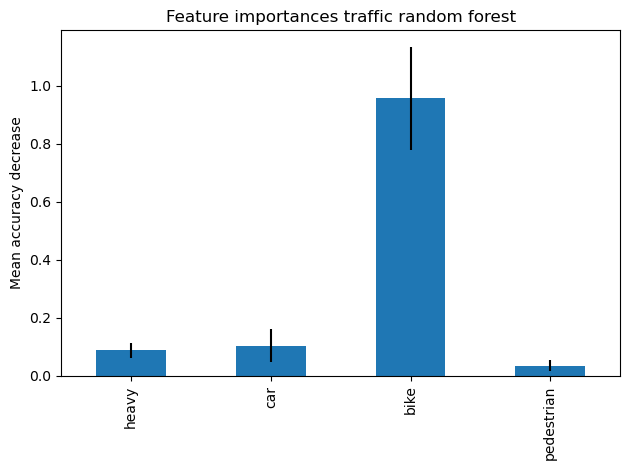

In [110]:
start_time = time.time()
result = permutation_importance(
    model, X_testtrlim, y_testtr, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=['heavy', 'car', 'bike', 'pedestrian'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances traffic random forest")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

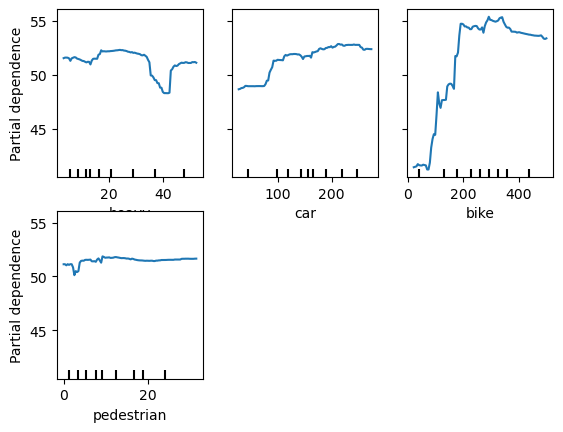

In [109]:
PartialDependenceDisplay.from_estimator(model, X_traintrlim, [0, 1, 2, 3])

#Bikes are by far the most important, followed by cars. However these are correlated variables

**XGBoost prediction model**

In [113]:
import xgboost as xgb

In [112]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
